In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.colors import Normalize
from scipy import stats as sps

import pandas as pd

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
def explicit_scheme(y0, tn, lam):
    res = np.zeros_like(tn) + y0
    for i in range(len(tn) - 1):
        tau = tn[i + 1] - tn[i]
        res[i + 1] = res[i] * (1 + lam * tau)
    return res


def implicit_scheme(y0, tn, lam):
    res = np.zeros_like(tn) + y0
    for i in range(len(tn) - 1):
        tau = tn[i + 1] - tn[i]
        res[i + 1] = res[i] / (1 - lam * tau)
    return res


def mid_term_scheme(y0, tn, lam):
    res = np.zeros_like(tn) + y0
    for i in range(len(tn) - 1):
        tau = tn[i + 1] - tn[i]
        res[i + 1] = (1 + 0.5 * lam * tau) / (1 - 0.5 * lam * tau) * res[i]
    return res

In [3]:
y0 = 1
tn_true = np.linspace(0, 1, 10000)
exact = lambda y0, tn, lam: y0 * np.exp(lam * tn)

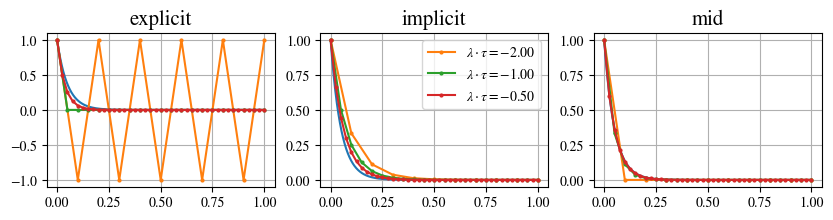

In [4]:
lam = -20
fig, ax = plt.subplots(1, 3, figsize=(10, 2))

schemes = {"explicit" : explicit_scheme, "implicit" : implicit_scheme, "mid" : mid_term_scheme}

for i, (name, scheme) in enumerate(schemes.items()):
    ax[i].set_title(name, fontsize=15)
    ax[i].plot(tn_true, exact(y0, tn_true, lam))
    tn, tau = np.linspace(0, 1, 11, retstep=True)
    ax[i].plot(tn, scheme(y0, tn, lam), '-o', ms=2, label=fr'$\lambda \cdot \tau = {tau * lam : 0.2f}$')
    tn, tau = np.linspace(0, 1, 21, retstep=True)
    ax[i].plot(tn, scheme(y0, tn, lam), '-o', ms=2, label=fr'$\lambda \cdot \tau = {tau * lam : 0.2f}$')
    tn, tau = np.linspace(0, 1, 41, retstep=True)
    ax[i].plot(tn, scheme(y0, tn, lam), '-o', ms=2, label=fr'$\lambda \cdot \tau = {tau * lam : 0.2f}$')
    #ax[i].set_ylim(0, 1)
    ax[i].grid()
ax[1].legend()
plt.show()

In [5]:
from collections import defaultdict
from tqdm.notebook import tqdm

In [6]:
schemes = {"explicit" : explicit_scheme, "implicit" : implicit_scheme, "mid" : mid_term_scheme}
nts = 10 * (2 ** np.arange(11))

errors = defaultdict(list)

for name, scheme in schemes.items():
    for nt in nts:
        tn, tau = np.linspace(0, 1, nt, retstep=True)
        solution = scheme(y0, tn, lam)
        true = exact(y0, tn, lam)
        errors[name].append(np.linalg.norm(solution - true) * np.sqrt(tau))
    errors[name] = np.array(errors[name])
errors = pd.DataFrame(errors)

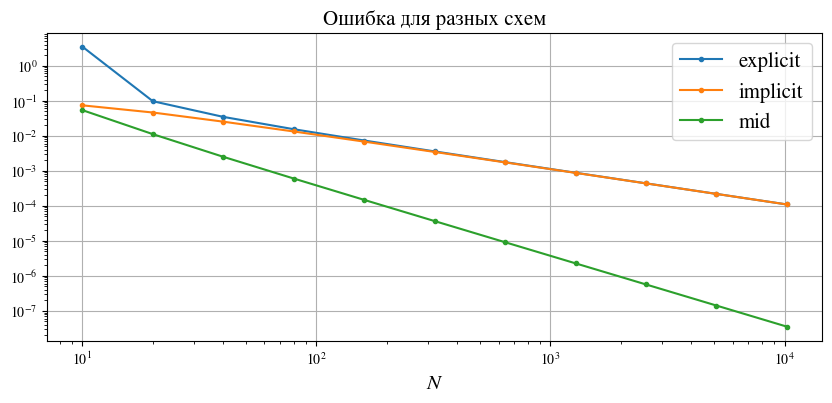

In [7]:
plt.figure(figsize=(10, 4))
plt.title("Ошибка для разных схем", fontsize=15)
plt.loglog(nts, errors, '-o', ms=3)
plt.legend(schemes.keys(), fontsize=15)
plt.grid()
plt.xlabel(r"$N$", fontsize=15)
plt.show()